# Project : NO show appointments

# Introduction

# data describtion : 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. example : 
1- scheduled day : the day at which patient book the appointment date . 
2-Appointment day : the day at which patient is going to see the doctor.
3-Neighbourhood : Is the place of the hosipital . 
4- Scholarship : indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família . 
5- you must put it into your concern that 0 means 'No' and 1 means 'Yes' in this data set . 

# Data set questions : 

1- Is there any correlation between the data ? 

2- What is the ratio between Males and Females ? 

3- How Gender affect showing up at the appointment ? 

4- How Gender having scholarship affect showing up at the appointment ? 

5- What is the ratio between people with scholarship and people without?

6- Is there a relation between having handicap and showing up at the appointment ?

7- Is there arelation between having Hypertension and showing up at the appointment ? 

8- What is the relation between having Diabetes and showing up at the appointment  ?

9- What is the relation between Alcoholism and showing up at the appointment ? 

10- What is the correlation between Gender age and showing up at the appointment ? 

11- What is the relation between Receiving SMS and showing up at the appointment ? 

# Data Wrangling

### importing packages and loading data into pandas data frame . 

In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Understanding the data 

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [12]:
data.shape

(110527, 14)

In [13]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Checking for null values 

In [14]:
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There is no null values 

#### Cheking for duplicates 

In [15]:
data.duplicated().sum()

0

there is no dublicates . 

### Data Modifications :

- convert Scheduled and Appointment columns to time 


- Add hours and secounds for Appointment day 

 - Add Waiting time column for Analysis 

- Renaming columns

#### 1 - convert Scheduled and Appointment columns to time 

In [16]:
data['ScheduledDay']= pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay']= pd.to_datetime(data['AppointmentDay'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

#### 2- Add Hours and secounds for appointment day 

In [17]:
data['AppointmentDay'] = data['AppointmentDay']+pd.Timedelta('1d')-pd.Timedelta('1s')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 23:59:59+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 23:59:59+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 23:59:59+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 23:59:59+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 3- Adding waiting_time column 

In [18]:
wait_col = data['AppointmentDay']-data['ScheduledDay']
data.insert(5,'Waiting_time',wait_col)
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Waiting_time,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 23:59:59+00:00,0 days 05:21:51,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 23:59:59+00:00,0 days 07:51:32,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 23:59:59+00:00,0 days 07:40:55,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 23:59:59+00:00,0 days 06:30:28,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 23:59:59+00:00,0 days 07:52:36,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### 4-Renaming columns 

In [19]:
rename_column = { 'patientid' : 'patient_id', 'appointmentid': 'appointment_id',
                 'scheduledday' : 'scheduled_day', 'appointmentday':'appointment_day',
                  'hipertension':'hypertension' ,'handcap':'handicap',
                 'no-show':'show'}

In [20]:
'''function used for renaming columns'''
def renaming_col (x):
    data.rename(columns = lambda x : x.strip().lower(),inplace = True)
    data.rename(columns = rename_column,inplace=True)
    return x 
renaming_col(rename_column)

{'patientid': 'patient_id',
 'appointmentid': 'appointment_id',
 'scheduledday': 'scheduled_day',
 'appointmentday': 'appointment_day',
 'hipertension': 'hypertension',
 'handcap': 'handicap',
 'no-show': 'show'}

In [21]:
data.head(3)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,waiting_time,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 23:59:59+00:00,0 days 05:21:51,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 23:59:59+00:00,0 days 07:51:32,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 23:59:59+00:00,0 days 07:40:55,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [22]:
data['show'].replace(['Yes','No'],[0,1],inplace=True)

In [23]:
show = data['show']*100

In [24]:
data.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,waiting_time,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 23:59:59+00:00,0 days 05:21:51,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 23:59:59+00:00,0 days 07:51:32,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 23:59:59+00:00,0 days 07:40:55,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 23:59:59+00:00,0 days 06:30:28,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 23:59:59+00:00,0 days 07:52:36,56,JARDIM DA PENHA,0,1,1,0,0,0,1


# Data_Analysis  

## Q1- Is there any correlation between the data ? 

In [25]:
data.corr()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
patient_id,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749,0.001461
appointment_id,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618,0.162602
age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,0.060319
scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,-0.029135
hypertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,0.035701
diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,0.015180
alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,0.000196
handicap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,0.006076
sms_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,-0.126431
show,0.001461,0.162602,0.060319,-0.029135,0.035701,0.015180,0.000196,0.006076,-0.126431,1.000000


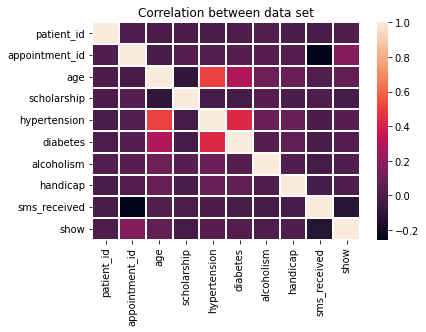

<Figure size 720x360 with 0 Axes>

In [34]:
plt.title('Correlation between data set');
sns.heatmap(data.corr(),linewidth=2);
plt.figure(figsize=(10,5));

##### From the graph above we can deduce the follow : 

- Hypertension has strong positive correlation with Age . 

- Hypertension has a medium positive correlation with Diabetes . 

- scholarship has anegative correlation with show . 

## Q2- What is the ratio between Males and Females ? 

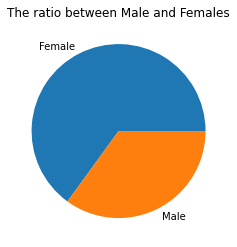

In [35]:
plt.pie(data["gender"].value_counts(),labels=['Female','Male']);
plt.title('The ratio between Male and Females');

We used apie chart to answer this question , As we can see the ratio between Males and Females is 1:2 . 

## Q3 - How gender affect showing up at the appointment ? 

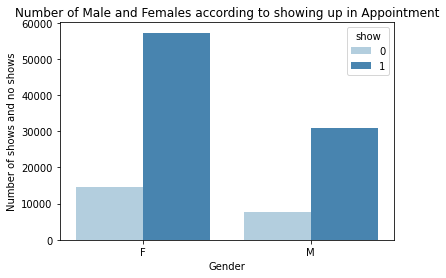

In [28]:
sns.countplot(data = data,x = data['gender'],hue= data['show'],palette='Blues');
plt.title('Number of Male and Females according to showing up in Appointment');
plt.xlabel('Gender');
plt.ylabel('Number of shows and no shows');

 we could see clearly that Number of females attending the appointment is more than males but this could be because of the difference in ratio between males and females . but we could also see that the number of Females and Males attending the appointment is more than who don't attend the appointment . so that we can conclude that showing up at the appointment doesn't depend on Gender . 

## Q4- How Gender having scholarship affect showing up at the appointment ? 

We start grouping gender , scholarship , shows and patient id to find the count of gender having scholarship and attend the appointment . 

In [20]:
data.groupby(['gender','scholarship','show'])['patient_id'].count()


gender  scholarship  show
F       0            0       12488
                     1       50499
        1            0        2106
                     1        6747
M       0            0        7253
                     1       29426
        1            0         472
                     1        1536
Name: patient_id, dtype: int64

From the above code we could deduce that: 1- in case of Females without scholarship the majority attend to show up at the appointment. 2- Females with scholarship the majority attend to show also . so, we can conclude that showing up at the appointment doesn't depend on scholarship in females . 


In cas of Males without scholarship the majority attend the appointment . Also Males having scholarship people who attend the appointment take the major part . so, We conclude that in both males and female showing up don't depend on scholarship. 

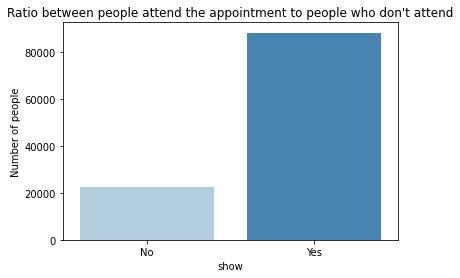

In [21]:
sns.countplot(data=data,x='show',palette='Blues');
plt.title("Ratio between people attend the appointment to people who don't attend");
plt.xticks([0,1],['No','Yes']);
plt.ylabel('Number of people');

This graph shows the ratio between people who attend the appointment to who don't attend.

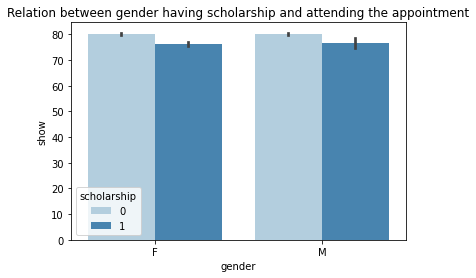

In [22]:
sns.barplot(data=data,x=data['gender'],y=show,hue=data['scholarship'],palette='Blues');
plt.title('Relation between gender having scholarship and attending the appointment');

This graph shows that there is no relation between having scholarship and showing up at the appointment .  

## Q5- What is the ratio between people with scholarship and people without ?

In [24]:
data['scholarship'].value_counts()

0    99666
1    10861
Name: scholarship, dtype: int64

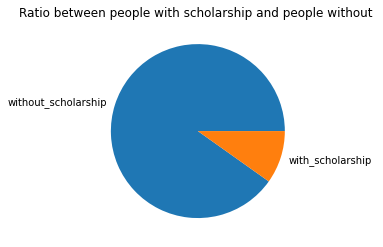

In [23]:
plt.pie(data['scholarship'].value_counts(),labels=['without_scholarship','with_scholarship']);
plt.title('Ratio between people with scholarship and people without ');

From the Pie chart we can deduce that nearly 80% of people don't have scholarship . 

## Q6- Is there a relation between having handicap and showing up at the appointment ? 

I will start by counting down the people who had handicap . 

In [27]:
data['handicap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

Since we want to find relation between handicaped and not handicaped . we just will assign people with more than one handicap to people who had one handicap to make the analysis much easier . 

In [28]:
data['handicap'].replace({0:0,1:1,2:1,3:1,4:1},inplace=True)

In [29]:
data['handicap'].value_counts()

0    108286
1      2241
Name: handicap, dtype: int64

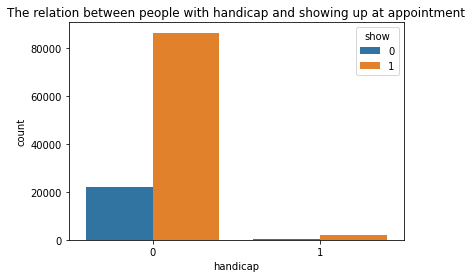

In [31]:
sns.countplot(data=data,x='handicap',hue='show')
plt.title('The relation between people with handicap and showing up at appointment');

We could see that people who had handicap most of them show up at the appointment.On the otherside people who don't have handicap the majority attend the appointment too . so we need to seperate genders to make the analysis more specific.

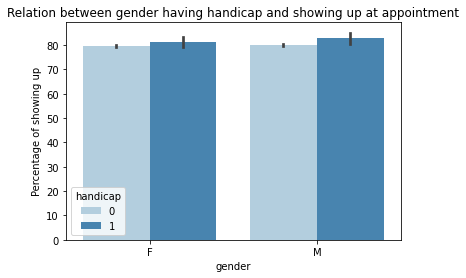

In [32]:
sns.barplot(data=data,x='gender',y=show,hue='handicap',palette='Blues');
plt.title('Relation between gender having handicap and showing up at appointment');
plt.ylabel('Percentage of showing up');

From the graph we concluded that there is positive correlation between gender having handicap and showing up at the appointment . 

## Q7- Is there a relation between having hypertension and showing up at appointment ? 

In [33]:
data['hypertension'].value_counts()

0    88726
1    21801
Name: hypertension, dtype: int64

We could see that people who don't have hypertension is more than who had and the following graph will discuss it obviously 

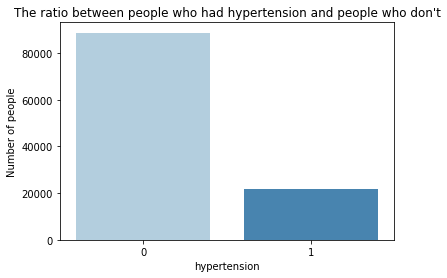

In [34]:
sns.countplot(data=data,x='hypertension',palette='Blues');
plt.title('The ratio between people who had hypertension and people who don\'t' );
plt.ylabel('Number of people');

We can then find a relation between hypertension and showing up at appointment . 

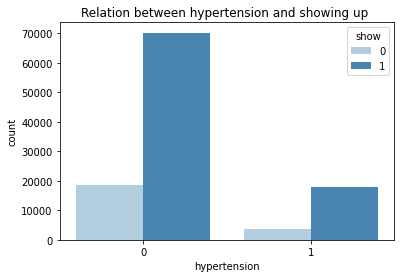

In [36]:
sns.countplot(data=data,x='hypertension',hue='show',palette='Blues');
plt.title('Relation between hypertension and showing up ');

From the graph we could see that the majority of people show up at the appointment in both cases so we will seperate genders to be more specific . 

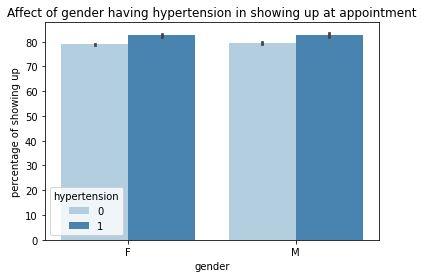

In [37]:
sns.barplot(data=data,x='gender',y=show,hue='hypertension',palette='Blues');
plt.title('Affect of gender having hypertension in showing up at appointment');
plt.ylabel('percentage of showing up');

We could see from the graph that there is a positive correlation between having hypertension and attending the appointment.
Since gender having hypertension seems to attend appointment more than gender who don't have hypertension. Although people who don't have hypertension is more than who don't have . 

## Q8- Relation between having diabetes and showing up at appointment ? 

We could start by counting down people who had diabetes 

In [38]:
data['diabetes'].value_counts()

0    102584
1      7943
Name: diabetes, dtype: int64

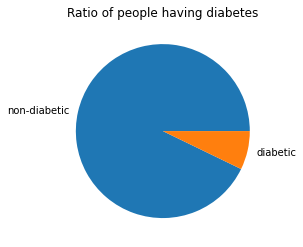

In [39]:
plt.pie(data['diabetes'].value_counts(),labels=['non-diabetic','diabetic']);
plt.title('Ratio of people having diabetes');

As we can see people who don't have diabetes is nearly 80% . 

We will now put a relation between having diabetes and showing up at appointment . 

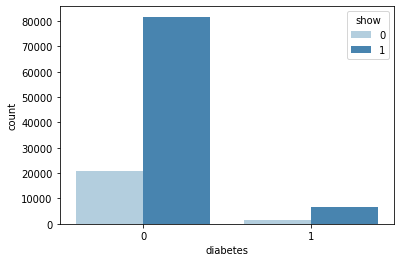

In [40]:
sns.countplot(data=data,x='diabetes',hue='show',palette='Blues');


We could see that the majority of people attend the appointment in both cases . so, we need to seperate genders to be more specific . 

Now let's make a plot shows the relation between gender , diabetes and showing up at appointment . 

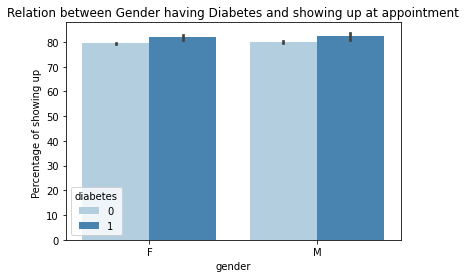

In [41]:
sns.barplot(data=data,x='gender',y=show,hue='diabetes',palette='Blues');
plt.title('Relation between Gender having Diabetes and showing up at appointment');
plt.ylabel('Percentage of showing up ');

From the graph we can conclude that the ratio of Gender that have Diabetes and showed up at appointment is more than gender that don't have Diabetes.  

## Q9 - Relation between gender , Alcholism and showing up at the appointment

First we will find the count of Alcoholism . 

In [44]:
data['alcoholism'].value_counts()

0    107167
1      3360
Name: alcoholism, dtype: int64

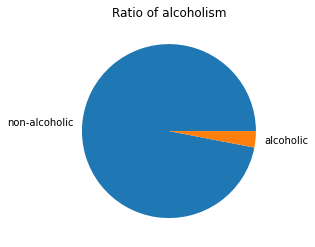

In [43]:
plt.pie(data['alcoholism'].value_counts(),labels=['non-alcoholic','alcoholic']);
plt.title('Ratio of alcoholism');

We could see that the Alcoholism are the minority . 

Let's plot arelation between gender having alcohol and showing up at the appointment . 

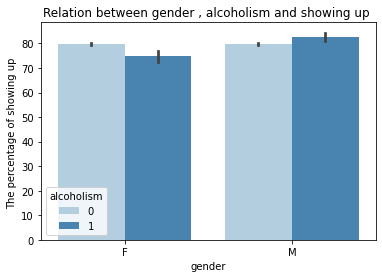

In [45]:
sns.barplot(data=data,x='gender',y=show,hue='alcoholism',palette='Blues');
plt.title('Relation between gender , alcoholism and showing up ');
plt.ylabel('The percentage of showing up ');

From the graph we deduce that : In females, the non-alcoholic show up more than the alcoholic . 
in contrast, Alcoholic Males showed up more than the non-alcholic . 

## Q10- What is the correlation between gender age and showing up at the appointment ? 

We wil start by analysing Ages and try finding the minimum , maximum , mean and nan . 

In [46]:
data['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

I see that the minimum ge is -1 and this doesn't make sense so iam going to filter it and drop that row . 

In [47]:
data.query('age == -1 ')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,waiting_time,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 23:59:59+00:00,0 days 15:01:46,-1,ROMÃO,0,0,0,0,0,0,1


In [48]:
data.drop(data.index[99832],inplace=True)

I removed the -1 age row it was a female 

In [49]:
data.describe()

,patient_id,appointment_id,waiting_time,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
count,1.105260e+05,1.105260e+05,110526,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,10 days 17:08:41.047952517,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029,0.798066
std,2.560943e+14,7.129544e+04,15 days 05:51:31.240428096,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874,0.401445
min,3.921784e+04,5.030230e+06,-6 days +10:10:39,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,0 days 15:41:31,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,5.680572e+06,4 days 11:22:32,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.438963e+13,5.725523e+06,15 days 07:41:36.750000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,179 days 13:19:00,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


the minimum value of age still doesn't make any sense it's 0  . so i will look at it and do the suitable modification .

In [50]:
data.query('age==0')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,waiting_time,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
59,7.184428e+13,5638545,F,2016-04-29 08:08:43+00:00,2016-04-29 23:59:59+00:00,0 days 15:51:16,0,CONQUISTA,0,0,0,0,0,0,1
63,2.366233e+14,5628286,M,2016-04-27 10:46:12+00:00,2016-04-29 23:59:59+00:00,2 days 13:13:47,0,SÃO BENEDITO,0,0,0,0,0,0,1
64,1.885174e+14,5616082,M,2016-04-25 13:28:21+00:00,2016-04-29 23:59:59+00:00,4 days 10:31:38,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,1
65,2.718818e+14,5628321,M,2016-04-27 10:48:50+00:00,2016-04-29 23:59:59+00:00,2 days 13:11:09,0,CONQUISTA,0,0,0,0,0,0,1
67,8.647128e+13,5639264,F,2016-04-29 08:53:02+00:00,2016-04-29 23:59:59+00:00,0 days 15:06:57,0,NOVA PALESTINA,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16 12:30:58+00:00,2016-06-01 23:59:59+00:00,16 days 11:29:01,0,RESISTÊNCIA,0,0,0,0,0,0,1
110346,5.577525e+12,5777724,M,2016-06-06 14:22:34+00:00,2016-06-08 23:59:59+00:00,2 days 09:37:25,0,RESISTÊNCIA,0,0,0,0,0,0,1
110454,6.142460e+11,5772400,F,2016-06-03 15:18:44+00:00,2016-06-03 23:59:59+00:00,0 days 08:41:15,0,RESISTÊNCIA,0,0,0,0,0,0,1
110460,4.321846e+13,5769545,F,2016-06-03 08:56:51+00:00,2016-06-03 23:59:59+00:00,0 days 15:03:08,0,RESISTÊNCIA,0,0,0,0,0,0,1


It seems that we have 3539 rows with zero age , so i will change the value to Nan . 

In [51]:
data['age'].replace(0,np.nan,inplace=True)

In [52]:
data['age'].describe()

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: age, dtype: float64

Now the minimum value of age is 1 this make more sense . 

I'm going to plot a Boxplot to show the distribution of the age . 

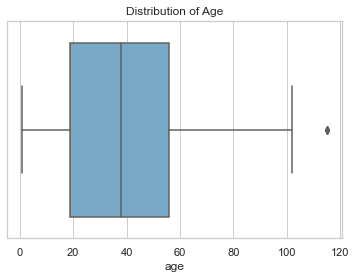

In [54]:
sns.boxplot(data=data,x='age',palette='Blues');
plt.title('Distribution of Age');

The outliers in the above graph is the value of five people of age 115 years old  . 

In [55]:
data.query('age==115')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,waiting_time,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
63912,3.196321e+13,5700278,F,2016-05-16 09:17:44+00:00,2016-05-19 23:59:59+00:00,3 days 14:42:15,115.0,ANDORINHAS,0,0,0,0,1,0,0
63915,3.196321e+13,5700279,F,2016-05-16 09:17:44+00:00,2016-05-19 23:59:59+00:00,3 days 14:42:15,115.0,ANDORINHAS,0,0,0,0,1,0,0
68127,3.196321e+13,5562812,F,2016-04-08 14:29:17+00:00,2016-05-16 23:59:59+00:00,38 days 09:30:42,115.0,ANDORINHAS,0,0,0,0,1,0,0
76284,3.196321e+13,5744037,F,2016-05-30 09:44:51+00:00,2016-05-30 23:59:59+00:00,0 days 14:15:08,115.0,ANDORINHAS,0,0,0,0,1,0,1
97666,7.482346e+14,5717451,F,2016-05-19 07:57:56+00:00,2016-06-03 23:59:59+00:00,15 days 16:02:03,115.0,SÃO JOSÉ,0,1,0,0,0,1,1


Now let's find the relation between age and showing up at appointment. 

We will use pandas.cut method to convert Age into groups of age ranges .

In [58]:
bins= [1,18,40,115]
labels=['1-17','18-39','40-115']
data['age_range']=pd.cut(data['age'],bins,labels=labels,include_lowest=True)

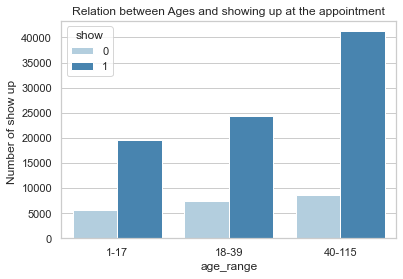

In [59]:
sns.countplot(data=data,x='age_range',hue='show',palette='Blues');
plt.title('Relation between Ages and showing up at the appointment');
plt.ylabel('Number of show up ');

We concluded that there is a positive correlation between age and showing up at the appointment , where when patient gets older the propability of showing up increases . 

The relation between gender age and showing up at the appointment is discussed in the following graph . 

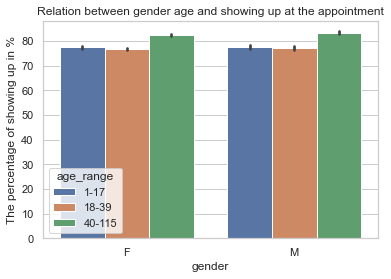

In [60]:
sns.barplot(data=data,x='gender',y=show,hue='age_range');
plt.title('Relation between gender age and showing up at the appointment');
plt.ylabel('The percentage of showing up in %');
figsize=(20,20)

From the above graph we can conclude that : 
1- In Females, age range [1:17] seem to attend appointment slightly more than age range [18:39] . while the great propability of showing up appears in age range [40:115] . 
2- In Males, age range [1:17] and [18:39] have nearly equal propability of showing up at the appointment , while age range [40:115] have the highest propability of showing up .

## Q11- What is the relation between receiving SMS and showing up at appointment ? 

In [61]:
data['sms_received'].value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

We could see from the above code that people who had received sms is less than who didn't receive sms . 

so let's plot agraph to find arelation between sms and show up .

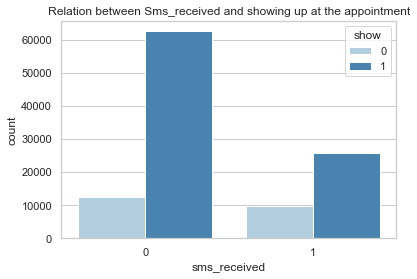

In [64]:
sns.countplot(data=data,x='sms_received',hue='show',palette='Blues');
plt.title('Relation between Sms_received and showing up at the appointment');

We could see that in both cases the number of people that showed up is more than who didn't show . 

so we need to add gender to the relation to make it more specific . 

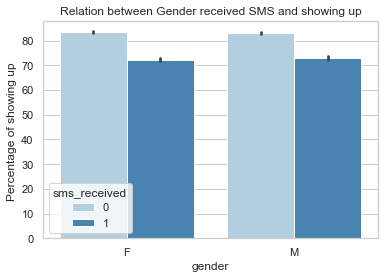

In [65]:
sns.barplot(data=data,x='gender',y=show,hue='sms_received',palette='Blues');
plt.title('Relation between Gender received SMS and showing up');
plt.ylabel('Percentage of showing up ');

from the graph we concluded that people that showed up at appointment without receiving sms is more than people who received sms. So,there is no relation between having SMS and showing up at the appointment.

# Conclusion

- There is anegative correlation between having scholarship and attending the appointment

- There is apositive correlation between having handicap and showing up at the appointment . 

- There is a positive correlation between Hypertension and showing up at the appointment . 

- There is also a positive correlation between having diabetes and showing up at the appointment . so , we can conclude that having disease increase the probability of showing up . 

- A strong positive correlation between Age and showing up , where old age has a high probability of showing up than youngs .  

- Negative correlation had been found between SMS-received and showing up at the appointment . 

### Limitations

- Most Data are categorical which don't allow high level of statistics . 

- The handicapped column has 5 value (0,1,2,3,4), where (1,2,3,4) are levels of handicapped so i changed them to be only 1 and 0 for non-handicapped . 

- Age column has one row of -1 value so, i removed this row and also has several rows of 0 value so i just changed them to NAN value . 